In [1]:
import spotpy
import os
import sys
import pandas as pd
import numpy as np
import subprocess
import shutil

In [2]:
sys.path.insert(1, 'd:/Projects/Tools/daycentpy_git')

In [3]:
from daycentpy import handler

- Set a working directory as project folder
- provide a path to your model folder

In [4]:
pwd = "D:/Projects/Tools/DayCent-CUTE/analysis/analysis_230216"
md = "d:/Projects/Tools/DayCent-CUTE/analysis/Wooster/"

In [5]:
m1 = handler.DCinit(pwd, md)

    We found DayCent parameter base file.
    Open the file and select parameters you are goint to use ..., 
    then save it as 'seleted_pars.csv'.


In [6]:
os.getcwd()

'D:\\Projects\\Tools\\DayCent-CUTE\\analysis\\analysis_230216'

In [7]:
sel_pars_df = m1.read_sel_dc_pars()

You have selected a total of 26 parameters.


In [8]:
sel_pars_df

,name,select,default,min,max,category
1,ANEREF(2),1,3.000000,2.800000,5.0000,fix
2,ANEREF(3),1,1.000000,0.200000,1.1000,fix
9,DEC3(1),1,6.000000,4.000000,8.0000,fix
11,DEC4,1,0.004300,0.001000,0.0050,fix
12,DEC5(2),1,0.120000,0.070000,0.2500,fix
20,FWLOSS(4),1,0.750000,0.200000,2.0000,fix
21,OMLECH(1),1,0.030000,0.000001,1.0000,fix
24,P1CO2A(2),1,0.170000,0.100000,0.2500,fix
25,P1CO2B(2),1,0.680000,0.550000,0.7400,fix
26,P2CO2(2),1,0.550000,0.500000,0.8000,fix


In [9]:
os.getcwd()

'D:\\Projects\\Tools\\DayCent-CUTE\\analysis\\analysis_230216'

In [10]:
os.chdir(os.path.join(os.getcwd(),'main'))

In [11]:
with open("DayCentRUN.DAT", "r") as f:
    data = [x.strip().split() for x in f]
print('')
print('  Simulation start ...')

for l, i in enumerate(range(len(data))):
    if len(data[i]) == 0:
        mlines = l
# mlines indicate only lines for model info
for i in range(mlines):
    if os.path.isfile(data[i][1]+".bin"):
        os.remove(data[i][1]+".bin")
    if len(data[i]) > 2:
        comline = 'DDcentEVI.exe -s {} -n {} -e {}'.format(data[i][1], data[i][1], data[i][3])
    else:
        comline = 'DDcentEVI.exe -s {} -n {}'.format(data[i][1], data[i][1])
    run_model = subprocess.Popen(comline, cwd=".", stdout=subprocess.DEVNULL)
#     run_model = subprocess.Popen(comline, cwd=".")
    run_model.wait()
    comline2 = 'DDlist100.exe {} {} {}'.format(data[i][1], data[i][1], 'outvars.txt')
    # os.system("start cmd {}".format(comline2))
    extract_model = subprocess.Popen(comline2, cwd=".", stdout=subprocess.DEVNULL)
    extract_model.wait()
    print('  Simulation complete ...')
    print('  extracting simulation outputs ...')


  Simulation start ...
  Simulation complete ...
  extracting simulation outputs ...
  Simulation complete ...
  extracting simulation outputs ...
  Simulation complete ...
  extracting simulation outputs ...
  Simulation complete ...
  extracting simulation outputs ...


In [12]:
wd = os.getcwd()

In [13]:
print(wd)

D:\Projects\Tools\DayCent-CUTE\analysis\analysis_230216\main


In [14]:
from daycentpy import modules

In [15]:
modules.run_dream(wd, sel_pars_df, 1000, parallel='mpc')

Initializing the  DiffeRential Evolution Adaptive Metropolis (DREAM) algorithm  with  1000  repetitions
The objective function will be minimized
Starting the DREAM algotrithm with 1000 repetitions...
Initialize  10  chain(s)...
1 of 1000, minimal objective function=706.336, time remaining: 02:56:32
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
* Database file 'DREAM_daycent.csv' created.
Beginn of Random Walk
11 of 1000, minimal objective function=643.195, time remaining: 00:57:41
21 of 1000, minimal objective function=623.238, time remaining: 00:46:50
Acceptance rates [%] = 50.   0. 100.  50.  50.   0. 100.  50.  50.   0.
Convergence rates =4.8768 3.8351 3.4787 2.7605 3.2675 4.6618 2.6044 5.4002 3.3056 5.7927
 2.4195 1.8064 2.198  4.193  3.26   3.5219 2.3187 5.6379 2.5205 3.7084
 4.3846 2.9921 2.1253 2.3648 3.4243 3.7348
31 of 1000, minimal objective function=602.981, time remaining: 00:41:55
Acceptance rates [%] =33.33 33.33 66.67 66.67 66.67  0.   66.67 33

C:\Users\seonggyu.park\Miniconda3\envs\daycentpy\Lib\site-packages\spotpy\algorithms\dream.py:239: RuntimeWarning: invalid value encountered in sqrt
  R_stat = np.sqrt(


41 of 1000, minimal objective function=602.981, time remaining: 00:38:19
Acceptance rates [%] =25. 50. 75. 75. 50. 25. 75. 25. 75.  0.
Convergence rates =2.52657532e+15 1.88040000e+00 4.62930000e+00 3.71900000e+00
 5.78820000e+00 6.74870000e+00 4.84910000e+00 4.33270000e+00
            nan 3.29760000e+00 1.62190000e+00 5.93580000e+00
 4.16330000e+00 5.19392863e+15 6.72820000e+00 5.29310000e+00
 6.48030000e+00 4.39576100e+15 5.38030000e+00 1.76088520e+15
 5.43500000e+00 4.30620000e+00 5.86060000e+00 2.54680000e+00
            nan 1.60520000e+00
51 of 1000, minimal objective function=602.981, time remaining: 00:36:01
Acceptance rates [%] =40. 60. 60. 80. 40. 20. 60. 20. 60.  0.
Convergence rates = 2.7226  1.8721  4.5667  2.902   3.031   6.7585  3.4325  7.5412  5.0041
  2.1459  1.6629  2.6066  3.288   4.4161  4.9542  6.9136  6.6835  2.054
  3.6377  4.9416  3.1584  4.8097  4.5813  2.8229 11.98    1.7658
61 of 1000, minimal objective function=502.487, time remaining: 00:34:19
Acceptance rat

KeyboardInterrupt: 

In [17]:
run.fast(wd, sel_pars_df, 1000, parallel='mpc')

Initializing the  Fourier Amplitude Sensitivity Test (FAST)  with  1000  repetitions
Starting the FAST algotrithm with 1000 repetitions...
Creating FAST Matrix


C:\Users\seonggyu.park\Miniconda3\envs\daycentpy\Lib\site-packages\spotpy\algorithms\fast.py:104: RuntimeWarning: divide by zero encountered in remainder
  omega[1:] = np.arange(D - 1) % m + 1


1 of 1000, min objf=907.296, max objf=907.296, time remaining: 02:46:22
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
* Database file 'FAST_hymod.csv' created.

*** Final SPOTPY summary ***
Total Duration: 885.88 seconds
Total Repetitions: 1014
Minimal objective value: 510.168
Corresponding parameter setting:
ANEREF(2): 3.92489
ANEREF(3): 0.660181
DEC3(1): 6.04525
DEC4: 0.00304525
DEC5(2): 0.0890018
FWLOSS(4): 1.12183
OMLECH(1): 0.511116
P1CO2A(2): 0.176697
P1CO2B(2): 0.647149
P2CO2(2): 0.653371
P3CO2: 0.705014
PMCO2(2): 0.528959
PS1CO2(2): 0.604525
PS1S3(1): 0.00353394
PS1S3(2): 0.0404525
PS2S3(1): 0.00353882
PS2S3(2): 0.00957918
TEFF(1): 17.7877
TEFF(2): 0.178023
WEFF(1): 30.1131
WEFF(2): 10.6067
dmp: 0.0055967
dmpflux: 5.14496e-05
FBM: 0.0304525
FHP: 0.504525
Till_Eff: 10.1229
Maximal objective value: 2178.45
Corresponding parameter setting:
ANEREF(2): 4.79607
ANEREF(3): 1.01657
DEC3(1): 7.62921
DEC4: 0.00462921
DEC5(2): 0.233342
FWLOSS(4): 1.83342
OMLECH(

C:\Users\seonggyu.park\Miniconda3\envs\daycentpy\Lib\site-packages\spotpy\algorithms\fast.py:168: RuntimeWarning: divide by zero encountered in remainder
  omega[1:] = np.arange(D - 1) % m + 1


Number of model runs: 1014
Number of parameters: 26
m = 0
Omega = [4. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
Parameter First Total
{'S1': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], 'ST': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]}
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
{'S1': [0.10848875092621078, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], 'ST': [0.7343420160932101, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]}
ANEREF2 0.108489 0.73434

C:\Users\seonggyu.park\Miniconda3\envs\daycentpy\Lib\site-packages\spotpy\analyser.py:500: RuntimeWarning: divide by zero encountered in remainder
  omega[1:] = np.arange(parnumber - 1) % m + 1


Number of model runs: 1014
Number of parameters: 26
m = 0
Omega = [4. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
Parameter First Total
{'S1': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], 'ST': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]}
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
{'S1': [0.10848875092621078, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], 'ST': [0.7343420160932101, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]}
ANEREF2 0.108489 0.73434

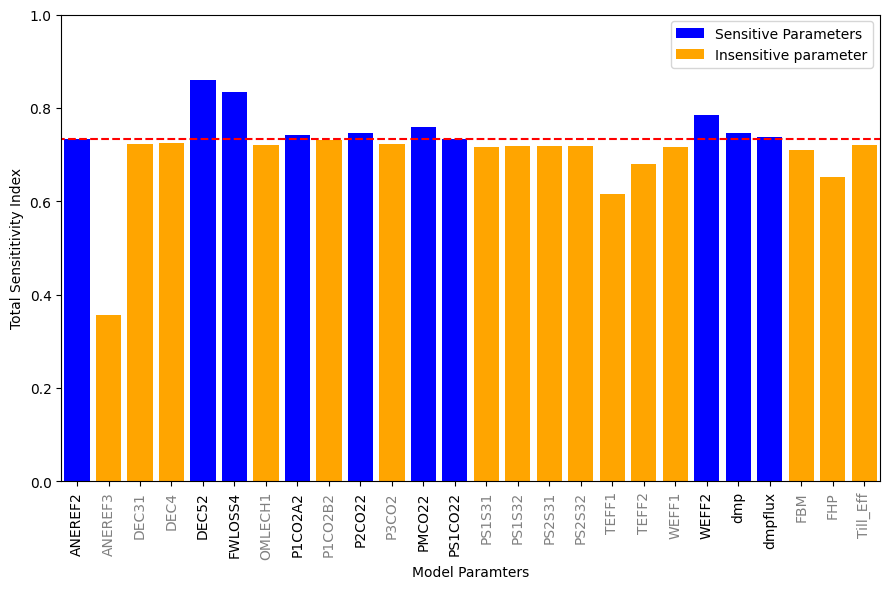

In [18]:
# Load the results gained with the fast sampler, stored in FAST_hymod.csv
results = spotpy.analyser.load_csv_results("FAST_hymod")

# Example plot to show the sensitivity index of each parameter
spotpy.analyser.plot_fast_sensitivity(results, number_of_sensitiv_pars=10)

# Example to get the sensitivity index of each parameter
SI = spotpy.analyser.get_sensitivity_of_fast(results)

In [ ]:
# dc_handler.run_dream(wd, sel_pars_df, "mpc", 2000, 20)